# Initialization

In [40]:
import numpy as np
from numpy.linalg import svd, norm, matrix_rank, solve, pinv
import scipy.linalg as splg
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import imageio

# Part 1: LS

In [111]:
def SVD_LS_solve(A, b):
  # Compute the SVD ------------------------------------------------------------
  #U, s, VH = svd(A)  

  # Compute the Moore-Penrose (left) pseudo-inverse ----------------------------
  #A_pi = (VH.T).dot(np.diag(1/s).dot(U.T))
  A_pi = pinv(A)      # There is already a function implemented in numpy.linalg which computes the pseudo inverse

  # Compute the LS solution with minimum norm ----------------------------------
  x_t = A_pi.dot(b)

  # Compute and display the norm of the solution and the error -----------------
  sol_norm = norm(x_t)
  err = norm(A.dot(x_t)-b)
  print("The obtained solution has norm: ", sol_norm)
  print("It gives an error of: ", err)

  return x_t, sol_norm, err

In [112]:
def QR_LS_solve(A, b):
  # QR decomposition -----------------------------------------------------------
  Q, R, P = splg.qr(A, pivoting=True)
  y = np.dot(Q.T, b)
  
  # If A is full-rank, these lines will have no effect -------------------------
  r = matrix_rank(A)
  n = A.shape[1]
  y1, y2 = y[:r], y[r:]
  R1 = R[:r, :r]

  x = np.concatenate((splg.solve_triangular(R1, y1)[:r], np.zeros(n - r)))

  # Compute the LS solution with minimum norm ----------------------------------
  x_t = solve(np.transpose(np.eye(n)[:,P]), x)

  # Compute and display the norm of the solution and the error -----------------
  sol_norm = norm(x_t)
  err = norm(A.dot(x_t)-b)
  print("The obtained solution has norm: ", sol_norm)
  print("It gives an error of: ", err)

  return x_t, sol_norm, err

Problem 1

In [113]:
# Problem 1 --------------------------------------------------------------------
# Load the data ----------------------------------------------------------------
X = np.genfromtxt('/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/datafile')
print(X[:6,:])

[[ 3.58324215 17.76294366]
 [ 3.94373317 20.05112325]
 [ 1.8638039   6.78387965]
 [ 5.64027081 39.12875825]
 [ 2.20656441  7.46308445]
 [ 3.15825263 14.17631979]]


In [114]:
# Separate the data ------------------------------------------------------------
x = X[:,0]
b = X[:,1]

# Define a function that returns the matrix A for a given degree d -------------
def A_mat(d):
  """A_mat
  Input: d (a given degree for the polynomial)
  Ouput: A 
  """
  A = np.ones([len(x), d])      # Initialize the matrix A
  for j in range(0, d):
    A[:,j] = x**j
  return A

In [115]:
# Generate the matrix A for a degree d -----------------------------------------
d = 9
A = A_mat(d)
print(A)

[[1.00000000e+00 3.58324215e+00 1.28396243e+01 ... 2.11668850e+03
  7.58460746e+03 2.71774852e+04]
 [1.00000000e+00 3.94373317e+00 1.55530313e+01 ... 3.76222826e+03
  1.48372244e+04 5.85140540e+04]
 [1.00000000e+00 1.86380390e+00 3.47376499e+00 ... 4.19180724e+01
  7.81270669e+01 1.45613532e+02]
 ...
 [1.00000000e+00 4.23604092e+00 1.79440427e+01 ... 5.77777842e+03
  2.44749058e+04 1.03676703e+05]
 [1.00000000e+00 4.49403587e+00 2.01963584e+01 ... 8.23795106e+03
  3.70216476e+04 1.66376612e+05]
 [1.00000000e+00 5.54627765e+00 3.07611957e+01 ... 2.91078172e+04
  1.61440036e+05 8.95391262e+05]]


In [116]:
# Solve the LS problem using SVD -----------------------------------------------
x_t_SVD, sol_norm, err = SVD_LS_solve(A, b)

The obtained solution has norm:  137.20330886132592
It gives an error of:  10.845499004346072


In [117]:
# Solve the LS problem using QR factorization ----------------------------------
x_t_QR = QR_LS_solve(A,b)

The obtained solution has norm:  137.20330858122685
It gives an error of:  10.845499004343921


Problem 2

In [118]:
# Problem 2 --------------------------------------------------------------------
# Load the data ----------------------------------------------------------------
df = pd.read_csv('/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/datafile2.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,-0.184704
1,1.0,1.0,0.878788,0.772268,0.678660,5.963981e-01,5.241074e-01,4.605792e-01,4.047514e-01,3.556907e-01,3.125766e-01,0.189993
2,1.0,1.0,0.292929,0.085808,0.025136,7.362939e-03,2.156821e-03,6.317959e-04,1.850715e-04,5.421287e-05,1.588054e-05,-1.499201
3,1.0,1.0,0.373737,0.139680,0.052203,1.951040e-02,7.291765e-03,2.725205e-03,1.018511e-03,3.806556e-04,1.422652e-04,-2.039879
4,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,1.054536


In [119]:
# Convert the data into matrix form --------------------------------------------
D = df.values

# Separate the matrix A and the vector b ---------------------------------------
A = D[:,:-1]
b = D[:,-1]

In [120]:
# Solve the LS problem using SVD -----------------------------------------------
x_t_SVD, sol_norm, err = SVD_LS_solve(A, b)

The obtained solution has norm:  4774736.291329754
It gives an error of:  1.149597895949238


In [121]:
# Solve the LS problem using QR factorization ----------------------------------
x_t_QR = QR_LS_solve(A,b)

The obtained solution has norm:  4774736.287080475
It gives an error of:  1.1495978959015904


# Part 2: Graphics compression

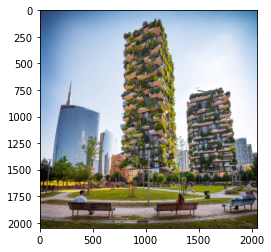

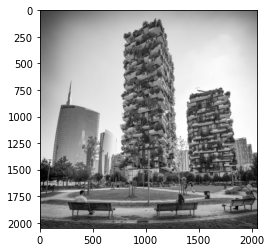

In [41]:
# Import the image using matplotlib.pyplot.imread ------------------------------
img = Image.open("/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/bosco_verticale.jpg")
imggray = img.convert('LA')
plt.figure()
plt.imshow(img);
plt.figure()
plt.imshow(imggray);

In [42]:
# Define a function that computes the best k rank approximation of the image ---
def k_rank_approx(img, mode, ks, f_name="NO"):
  """ k_rank_approx
  Inputs: img (grayscale or RGB), mode ("BW" or "RGB"), ks (array of values of k, rank of the approximation)
  Output: None (it shows a preview of the produced images and it saves them as .jpeg files)
  """
  if mode=="BW":
    imggray = img.convert('LA')     # Making sure the image is in a grayscale
    plt.figure()
    plt.imshow(imggray);
    plt.title("Original image")

    # Convert the image to a numpy matrix --------------------------------------
    X = np.array(list(imggray.getdata(band=0)), float)
    X.shape = (imggray.size[1], imggray.size[0])
    X = np.matrix(X)

    # SVD decomposition of the image -------------------------------------------
    U, s, VH = svd(X)     # SVD decomposition

    # Reconstruct the rank k best approximation of the image -------------------
    for k in ks:
      reconstimg = np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(VH[:k, :])

      # Show the image ---------------------------------------------------------
      compression_rate = int(norm(reconstimg-X)/norm(X)*100)
      plt.figure()
      plt.imshow(reconstimg, cmap='gray')
      title = "Compression of rank k=%s" % k + ", rate=" + str(compression_rate) + "%"
      plt.title(title)
      plt.show()

      # Save the image ---------------------------------------------------------
      if f_name != "NO":
        filename = f_name + "rank_" + str(k) + "_compression_rate_" + str(compression_rate) + "%" + ".jpeg"
        imageio.imwrite(filename, reconstimg)
  
  if mode=="RGB":
    plt.figure()
    plt.imshow(img);
    plt.title("Original image")

    red, green, blue = img.split()  # Split the image into channels
    # Convert each channel into matrices ---------------------------------------
    X_r = np.array(list(red.getdata(band=0)), float)
    X_r.shape = (red.size[1], red.size[0])
    X_r = np.matrix(X_r)
    X_r = X_r/255
    X_g = np.array(list(green.getdata(band=0)), float)
    X_g.shape = (green.size[1], green.size[0])
    X_g = np.matrix(X_g)
    X_g = X_g/255
    X_b = np.array(list(blue.getdata(band=0)), float)
    X_b.shape = (blue.size[1], blue.size[0])
    X_b = np.matrix(X_b)
    X_b = X_b/255

    # SVD decomposition of the image -------------------------------------------
    U_r, s_r, VH_r = svd(X_r)     # SVD decomposition for the red channel
    U_g, s_g, VH_g = svd(X_g)     # SVD decomposition for the green channel
    U_b, s_b, VH_b = svd(X_b)     # SVD decomposition for the blue channel

    # Reconstruct the rank k best approximation of each channel ----------------
    for k in ks:
      reconst_red = np.matrix(U_r[:, :k]) * np.diag(s_r[:k]) * np.matrix(VH_r[:k, :])
      reconst_green = np.matrix(U_g[:, :k]) * np.diag(s_g[:k]) * np.matrix(VH_g[:k, :])
      reconst_blue = np.matrix(U_b[:, :k]) * np.diag(s_b[:k]) * np.matrix(VH_b[:k, :])
      img_reconstructed = np.zeros([img.size[1], img.size[0], 3])
      img_reconstructed[:,:,0] = reconst_red
      img_reconstructed[:,:,1] = reconst_green
      img_reconstructed[:,:,2] = reconst_blue

      # Show the image ---------------------------------------------------------
      compression_rate = int((norm(reconst_red-X_r)/norm(X_r)+norm(reconst_green-X_g)/norm(X_g)+norm(reconst_blue-X_b)/norm(X_b))/3*100)
      plt.figure()
      plt.imshow(img_reconstructed);
      title ="Compression of rank k=%s" % k + ", rate=" + str(compression_rate) + "%"
      plt.title(title)
      plt.show()

      # Save the image ---------------------------------------------------------
      if f_name != "NO":
        filename = f_name + "rank_" + str(k) + "_compression_rate_" + str(compression_rate) + "%" + ".jpeg"
        imageio.imwrite(filename, img_reconstructed)

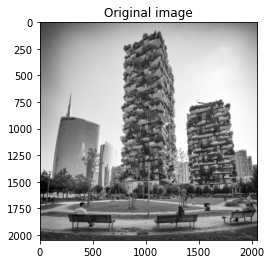

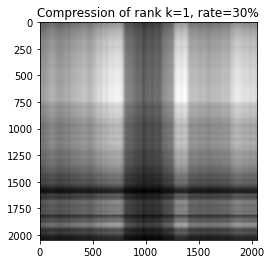

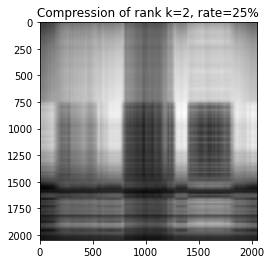

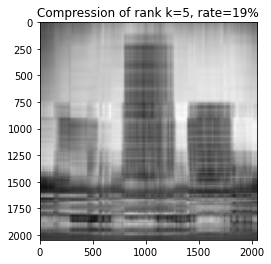

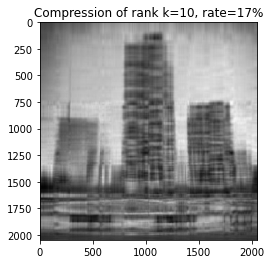

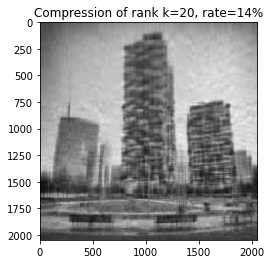

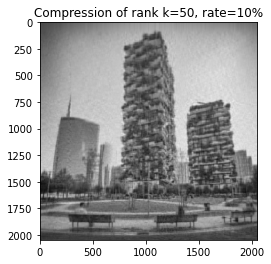

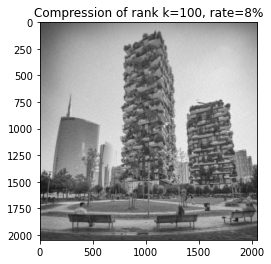

In [43]:
k_rank_approx(img, "BW", [1, 2, 5, 10, 20, 50, 100], "BV_BW")

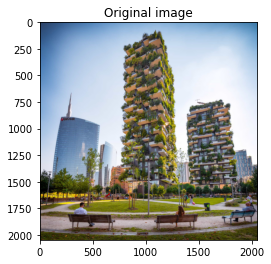

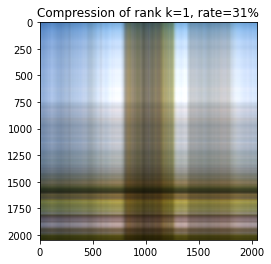

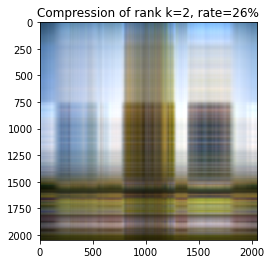

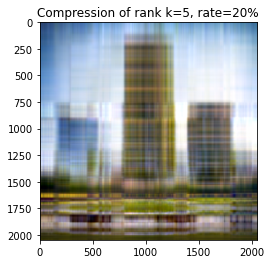

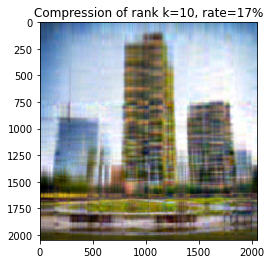

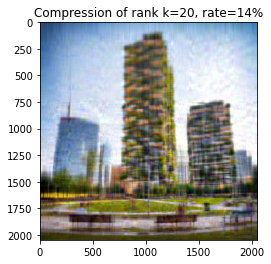

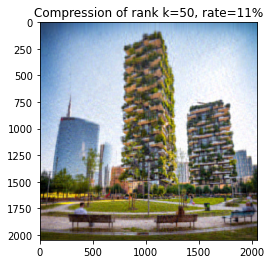

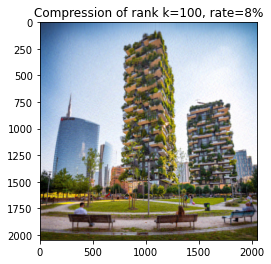

In [44]:
k_rank_approx(img, "RGB", [1, 2, 5, 10, 20, 50, 100], "BV_RGB")

In [23]:
# Define a function to compute the compression rate for all the possible values 
# of the rank k of the compression ---------------------------------------------
def compression_rate(img, mode):
  """compression_rate
  Input: img (grayscale or RGB), mode ("BW" or "RGB")
  Output: None (it shows a plot of the compression rate for all the possible ranks k)
  """
  if mode=="BW":
    imggray = img.convert('LA')     # Making sure the image is in a grayscale
    plt.figure()
    plt.imshow(imggray);
    plt.title("Original image")

    # Convert the image to a numpy matrix --------------------------------------
    X = np.array(list(imggray.getdata(band=0)), float)
    X.shape = (imggray.size[1], imggray.size[0])
    X = np.matrix(X)

    # Initialize vectors -------------------------------------------------------
    ks = np.arange(1, min(X.shape)+1)
    compression_rate = np.zeros([min(X.shape), 1])

    # SVD decomposition of the image -------------------------------------------
    U, s, VH = svd(X)     # SVD decomposition

    # Reconstruct the rank k best approximation of the image -------------------
    for k in ks:
      reconstimg = np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(VH[:k, :])

      # Compute the compression rate -------------------------------------------
      compression_rate[k-1] = (norm(reconstimg-X)/norm(X)*100)

    # Plot the compression rate ------------------------------------------------
    plt.figure()
    plt.plot(ks, compression_rate)
    plt.title("BW Compression rate")
  
  if mode=="RGB":
    plt.figure()
    plt.imshow(img);
    plt.title("Original image")

    red, green, blue = img.split()  # Split the image into channels
    # Convert each channel into matrices ---------------------------------------
    X_r = np.array(list(red.getdata(band=0)), float)
    X_r.shape = (red.size[1], red.size[0])
    X_r = np.matrix(X_r)
    X_r = X_r/255
    X_g = np.array(list(green.getdata(band=0)), float)
    X_g.shape = (green.size[1], green.size[0])
    X_g = np.matrix(X_g)
    X_g = X_g/255
    X_b = np.array(list(blue.getdata(band=0)), float)
    X_b.shape = (blue.size[1], blue.size[0])
    X_b = np.matrix(X_b)
    X_b = X_b/255

    # SVD decomposition of the image -------------------------------------------
    U_r, s_r, VH_r = svd(X_r)     # SVD decomposition for the red channel
    U_g, s_g, VH_g = svd(X_g)     # SVD decomposition for the green channel
    U_b, s_b, VH_b = svd(X_b)     # SVD decomposition for the blue channel

    # Initialize vectors -------------------------------------------------------
    ks = np.arange(1, min(X_r.shape)+1)
    compression_rate = np.zeros([min(X_r.shape), 1])

    # Reconstruct the rank k best approximation of each channel ----------------
    for k in ks:
      reconst_red = np.matrix(U_r[:, :k]) * np.diag(s_r[:k]) * np.matrix(VH_r[:k, :])
      reconst_green = np.matrix(U_g[:, :k]) * np.diag(s_g[:k]) * np.matrix(VH_g[:k, :])
      reconst_blue = np.matrix(U_b[:, :k]) * np.diag(s_b[:k]) * np.matrix(VH_b[:k, :])
      img_reconstructed = np.zeros([img.size[1], img.size[0], 3])
      img_reconstructed[:,:,0] = reconst_red
      img_reconstructed[:,:,1] = reconst_green
      img_reconstructed[:,:,2] = reconst_blue

      # compute the compression rate -------------------------------------------
      compression_rate[k-1] = ((norm(reconst_red-X_r)/norm(X_r)+norm(reconst_green-X_g)/norm(X_g)+norm(reconst_blue-X_b)/norm(X_b))/3*100)

    # Plot the compression rate ------------------------------------------------
    plt.figure()
    plt.plot(ks, compression_rate)
    plt.title("RGB Compression rate")

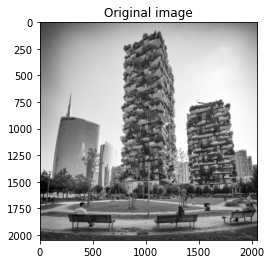

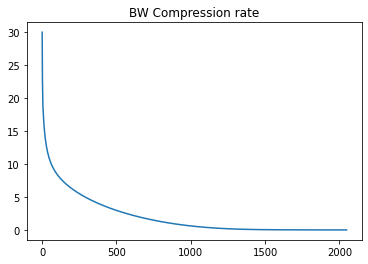

In [24]:
compression_rate(img, "BW")

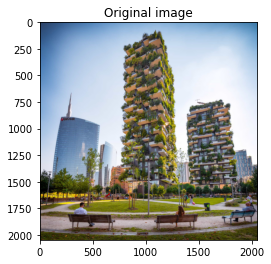

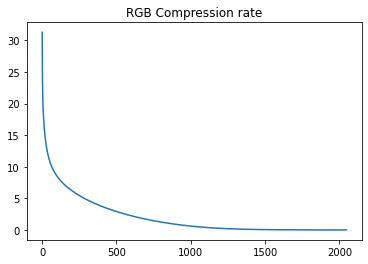

In [25]:
compression_rate(img, "RGB")

Other experiments

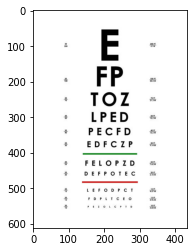

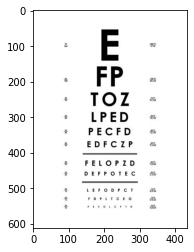

In [45]:
# Import the image using matplotlib.pyplot.imread ------------------------------
img = Image.open("/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/Letters.jpg")
imggray = img.convert('LA')
plt.figure()
plt.imshow(img);
plt.figure()
plt.imshow(imggray);

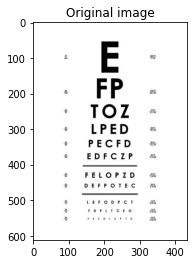

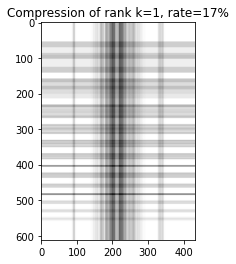

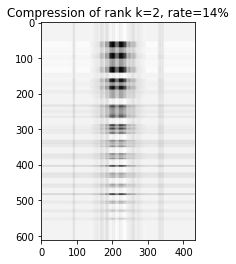

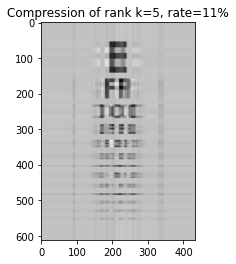

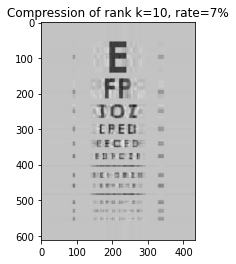

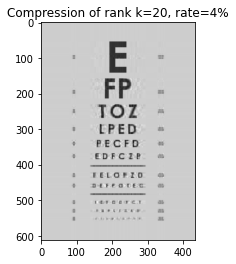

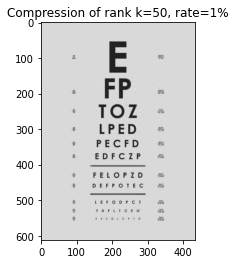

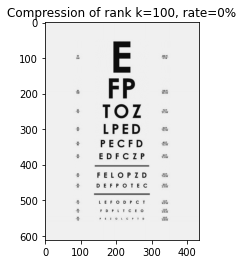

In [46]:
k_rank_approx(img, "BW", [1, 2, 5, 10, 20, 50, 100], "Letters_BW")

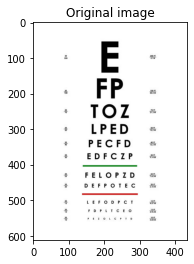

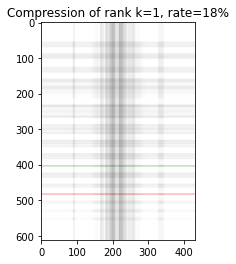

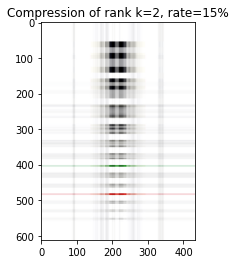

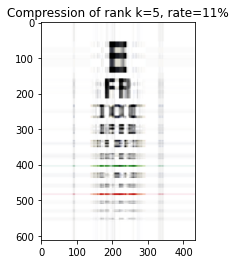

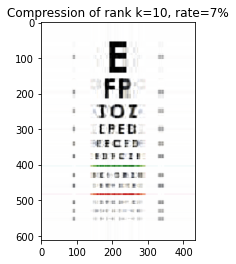

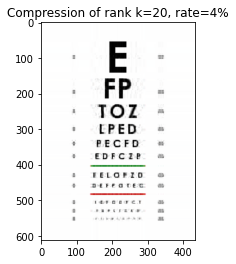

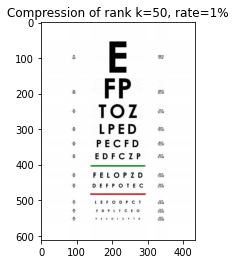

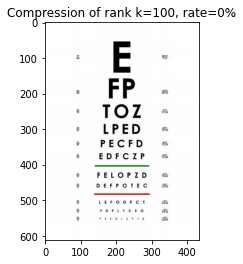

In [47]:
images = k_rank_approx(img, "RGB", [1, 2, 5, 10, 20, 50, 100], "Letters_RGB")

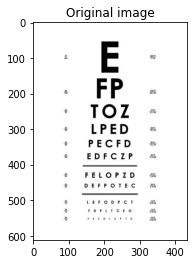

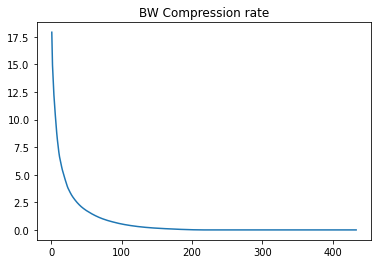

In [33]:
compression_rate(img, "BW")

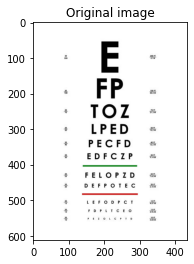

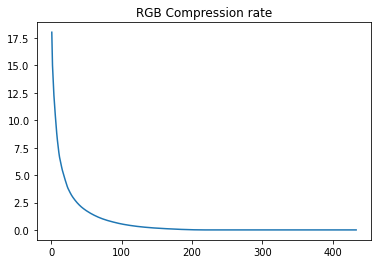

In [34]:
compression_rate(img, "RGB")

# Part 3.1: PCA

In [23]:
# Load the data for the first problem ------------------------------------------
data = np.genfromtxt('/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/example.dat', delimiter=' ')
print(data)

[[6. 5. 3. 4.]
 [7. 3. 2. 2.]
 [6. 4. 4. 5.]
 [5. 7. 1. 3.]
 [7. 7. 5. 5.]
 [6. 4. 2. 3.]
 [5. 7. 2. 1.]
 [6. 5. 4. 4.]
 [3. 5. 6. 7.]
 [1. 3. 7. 5.]
 [2. 6. 6. 7.]
 [5. 7. 7. 6.]
 [2. 4. 5. 6.]
 [3. 5. 6. 5.]
 [1. 6. 5. 5.]
 [2. 3. 7. 7.]]


In [24]:
# Define a function to do PCA Analysis on a given dataset ----------------------
def PCA(data, mode, full_matrices=True):
  # Retrieve the dimensions of the problem -------------------------------------
  m = data.shape[0]
  n = data.shape[1]

  # Covariance matrix ----------------------------------------------------------
  if mode=="Covariance":
    # Center the data ----------------------------------------------------------
    means = np.mean(data, axis=0)
    X = np.copy(data)
    idx = 0
    for mean in means:
      X[:,idx] = data[:,idx]-mean
      idx = idx+1
  # Correlation matrix ---------------------------------------------------------
  if mode=="Correlation":
    # Standardize the data -----------------------------------------------------
    means = np.mean(data, axis=0)
    std_devs = np.std(data, axis=0)
    X = np.copy(data)
    idx = 0
    for mean in means:
      X[:,idx] = (data[:,idx]-mean)/std_devs[idx]
      idx = idx+1

  # Analysis -------------------------------------------------------------------
  Y = (1/np.sqrt(n-1))*(X.T)    # Define Y such that Y.T*Y=Cx
  U, s, VH = svd(Y, full_matrices=full_matrices)     # SVD decomposition

  tot_var = np.dot(s, s)
  rel_var = s*s/tot_var*100
  print("s: ", s)
  print("Total variance: ", tot_var)
  print("Relative variance: ", rel_var)

  x_labels = []
  for i in range(0, len(rel_var)):
    x_labels.append("PC"+str(i+1))
  plt.figure()
  plt.bar(x_labels, rel_var)
  plt.title("Scree Plot")

  # Compute the new PCA coordinates --------------------------------------------
  X_new = X.dot(U)

  plt.figure()
  plt.scatter(X_new[:,0], X_new[:,1], alpha=0.4)
  plt.xlabel("PC1: " + str(rel_var[0]) + "% variance")
  plt.ylabel("PC2: " + str(rel_var[1]) + "% variance")

  return X_new, rel_var #std_dev

s:  [6.82791447 3.32543619 3.05996285 1.6005787 ]
Total variance:  69.60416666666673
Relative variance:  [66.97934657 15.88773541 13.45231628  3.68060174]


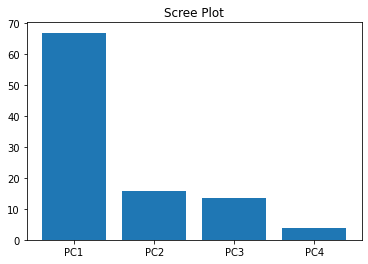

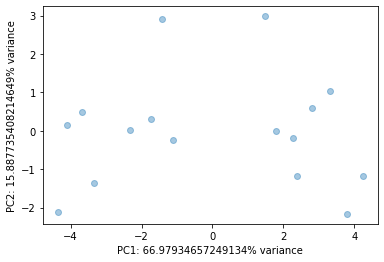

In [25]:
X_new, rel_var = PCA(data, "Covariance")

s:  [3.60021554 2.26415807 1.57424327 0.87585829]
Total variance:  21.333333333333357
Relative variance:  [60.75727481 24.03005513 11.61675874  3.59591131]


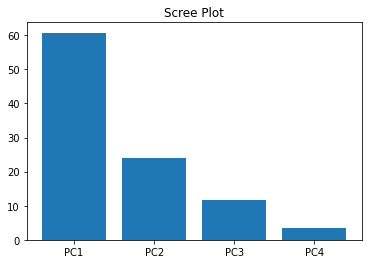

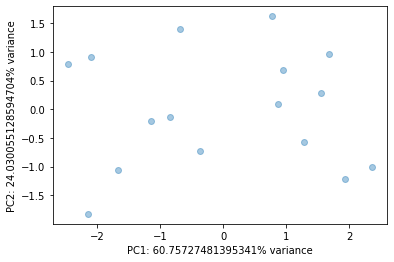

In [26]:
X_new, rel_var = PCA(data, "Correlation")

# Part 3.2: PCA

In [33]:
# Load the data for the second problem -----------------------------------------
df = pd.read_csv('/content/drive/MyDrive/10 - UB /20 - Colab Notebooks/UB Courses/Numerical Linear Algebra/Project_2/RCsGoff.csv')
df.head()

,gene,day0_rep1,day0_rep2,day0_rep3,day1_rep1,day1_rep2,day1_rep3,day2_rep1,day2_rep2,day2_rep3,...,day4_rep2,day4_rep3,day5_rep1,day5_rep2,day11_rep1,day11_rep2,day11_rep3,day18_rep1,day18_rep2,day18_rep3
0,DDX11L1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,2,0
1,WASH7P,1113,897,1498,2130,2047,1876,1366,1359,1439,...,2635,2242,4500,2303,2714,3056,3332,3393,2846,2585
2,MIR6859-1,8,9,18,28,15,24,13,15,14,...,20,12,47,16,25,30,40,24,29,31
3,RP11-34P13.3,0,0,0,3,4,4,3,1,0,...,4,0,0,0,1,5,0,2,0,0
4,MIR1302-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df = df.drop("gene", axis=1)

In [35]:
df.head()

,day0_rep1,day0_rep2,day0_rep3,day1_rep1,day1_rep2,day1_rep3,day2_rep1,day2_rep2,day2_rep3,day4_rep1,day4_rep2,day4_rep3,day5_rep1,day5_rep2,day11_rep1,day11_rep2,day11_rep3,day18_rep1,day18_rep2,day18_rep3
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0
1,1113,897,1498,2130,2047,1876,1366,1359,1439,2956,2635,2242,4500,2303,2714,3056,3332,3393,2846,2585
2,8,9,18,28,15,24,13,15,14,16,20,12,47,16,25,30,40,24,29,31
3,0,0,0,3,4,4,3,1,0,2,4,0,0,0,1,5,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
samples = list(df.columns)        # Retrieve the columns labels for later
data = (df.values).T       # Traspose the data so that the rows are the samples
data.shape

(20, 58581)

s:  [9.45201056e+03 4.41640623e+03 2.87498833e+03 1.88891664e+03
 1.23096864e+03 7.55009464e+02 6.69469473e+02 4.41222506e+02
 2.25598276e+02 1.96887031e+02 1.20409627e+02 1.14578123e+02
 1.12519760e+02 1.00047122e+02 7.99455518e+01 7.34735338e+01
 7.04843005e+01 6.03955307e+01 5.62456302e+01 1.03801599e+00]
Total variance:  123570427.14061117
Relative variance:  [7.22992594e+01 1.57842329e+01 6.68894499e+00 2.88742716e+00
 1.22625116e+00 4.61307211e-01 3.62699544e-01 1.57543600e-01
 4.11867010e-02 3.13703723e-02 1.17329676e-02 1.06240196e-02
 1.02457334e-02 8.10017966e-03 5.17218512e-03 4.36865057e-03
 4.02040903e-03 2.95185524e-03 2.56013594e-03 8.71953934e-07]


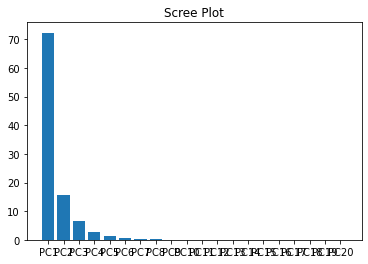

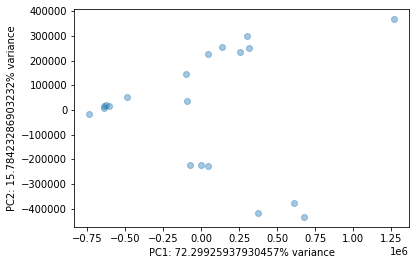

In [37]:
X_new, rel_var = PCA(data, "Covariance", False)

In [38]:
X_new.shape

(20, 20)

In [39]:
# Write the output file --------------------------------------------------------
columns = []
for i in range(1, 21):
  columns.append("PC" + str(i))
output_df = pd.DataFrame(X_new.T, columns = columns)
output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-737148.311093,-610792.006040,-488586.415635,43477.187669,-3686.989277,-73666.595023,-641145.016612,-639112.067632,-624921.003880,315651.047731,251755.342858,-99044.165358,1.266465e+06,-93573.157295,371470.823161,609064.661691,676034.473368,299660.252477,132991.865102,45133.211767
1,-18656.713017,16609.783319,52929.031986,-227191.839947,-224761.330510,-224200.765248,15274.774495,6246.314664,18922.676836,252014.788053,233057.286286,145422.471825,3.672247e+05,37078.333944,-418850.914628,-377229.716512,-433563.111089,297336.642652,256696.573241,225621.899697
2,-164211.902953,-199709.494241,-316000.517086,47293.137485,49941.909162,74298.715225,139174.503939,143589.880529,140255.205825,233254.874050,229420.297059,222473.851553,-6.163738e+04,54049.812093,-42063.371444,131.368396,-77405.952614,-192112.389282,-151239.660088,-129545.620072
3,33261.785696,89598.216958,53230.065376,114570.399171,97741.102365,106977.293973,-68520.486411,-65832.305786,-84466.422078,21079.236350,26759.561073,29129.765909,1.261422e+05,36583.651036,53006.232194,-310356.304335,27926.112169,-96511.034668,-104101.866680,-86240.924854
4,54946.400656,120565.534995,70851.251976,-47116.407494,-55655.427169,-40117.226752,-18383.836845,-28452.799694,-31130.861472,43742.557426,43107.498651,44028.891431,6.711478e+04,-1729.742814,-40227.735128,134957.621758,-41917.686318,-100039.366575,-94448.039663,-80074.408709
5,7871.861701,498.494046,-8567.415667,-68851.105391,-75025.195517,-64244.256742,38219.619432,22350.972886,27286.895354,-9067.837833,-5547.566276,14744.317497,2.101555e+04,34517.981264,81873.537514,-47905.981502,66617.586195,-20576.679431,-15255.103315,81.990915
6,-784.172551,19674.493638,20068.565643,-8901.952555,-13067.766560,-15063.592526,-33612.824036,-21656.970557,-32753.754444,59445.579473,57854.087949,32117.258788,-8.255607e+04,-67239.659171,27761.531047,-17096.286958,34747.261488,25587.136834,11045.970944,4446.021715
7,-31876.874750,69060.977501,-50774.313150,16998.450342,-17968.705504,8657.934221,18039.227141,5023.836213,-9839.152856,-18164.056951,-7624.240603,7076.812683,5.767679e+03,-22981.757594,13230.786060,836.889174,-12692.820681,14286.362628,-5395.620692,18350.020110
8,4937.016899,-2342.168754,-6061.047962,7802.842356,-5354.105491,-5636.551281,-10991.729143,-7037.462201,-20410.987307,-6805.457159,1384.368641,17128.341993,-1.429334e+04,35782.130662,9242.964308,4338.333970,-13165.197783,6424.508125,-2394.089284,7461.993801
9,-4744.821027,-9458.479216,13496.594863,24723.708915,-10794.761840,-12630.126992,16165.697820,2529.689046,-4006.501201,5722.221398,663.049370,-9934.313498,1.777261e+03,-4536.793011,7110.783520,527.338717,-8123.251550,14068.909865,-17634.257484,-4924.980470
